# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [13]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


In [14]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [15]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

596

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [17]:
#starting URL
url = f"http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID={weather_api_key}&q="

#units
units = "imperial"

CITIES = []
Latitude = []
Longitude = []
Temperature = []
Humidity = []
Cloudiness = []
Windspeed = []
Country = []
Date = []


records = 0
sets = 1

# Loop through each cities and populate info into respective lists
for city in cities:
    response = requests.get(url + city).json()
    try:
        Latitude.append(response['coord']['lat'])
        Longitude.append(response['coord']['lon'])
        Temperature.append(response['main']['temp_max'])
        Humidity.append(response['main']['humidity'])
        Cloudiness.append(response['clouds']['all'])
        Windspeed.append(response['wind']['speed'])
        Country.append(response['sys']['country'])
        Date.append(response['dt'])
        if records > 48:
            records = 1
            sets += 1
            CITIES.append(city)
        else:
            records += 1
            CITIES.append(city)
        print(f"Processing Record {records} or Set {sets} | {city}")
    except:
        print(f"City not found. Skipping...")
print('''------------------------------
Data Retrieval Complete
------------------------------''')


Processing Record 1 or Set 1 | huarmey
Processing Record 2 or Set 1 | campbell river
Processing Record 3 or Set 1 | minab
Processing Record 4 or Set 1 | ndola
Processing Record 5 or Set 1 | busselton
Processing Record 6 or Set 1 | kodiak
Processing Record 7 or Set 1 | tasiilaq
Processing Record 8 or Set 1 | hilo
Processing Record 9 or Set 1 | port alfred
Processing Record 10 or Set 1 | la sarre
City not found. Skipping...
City not found. Skipping...
Processing Record 11 or Set 1 | amasya
Processing Record 12 or Set 1 | bud
Processing Record 13 or Set 1 | vao
Processing Record 14 or Set 1 | rikitea
Processing Record 15 or Set 1 | esperance
Processing Record 16 or Set 1 | buckeye
Processing Record 17 or Set 1 | hermanus
Processing Record 18 or Set 1 | mahebourg
Processing Record 19 or Set 1 | camacha
Processing Record 20 or Set 1 | ribeira grande
Processing Record 21 or Set 1 | kapaa
Processing Record 22 or Set 1 | butaritari
Processing Record 23 or Set 1 | hobart
Processing Record 24 or

Processing Record 41 or Set 4 | awjilah
Processing Record 42 or Set 4 | san cristobal
Processing Record 43 or Set 4 | nguru
Processing Record 44 or Set 4 | nome
Processing Record 45 or Set 4 | loandjili
Processing Record 46 or Set 4 | pisco
Processing Record 47 or Set 4 | rio gallegos
Processing Record 48 or Set 4 | deep river
Processing Record 49 or Set 4 | yaan
City not found. Skipping...
Processing Record 1 or Set 5 | dingle
Processing Record 2 or Set 5 | spornoye
Processing Record 3 or Set 5 | yerbogachen
Processing Record 4 or Set 5 | orocue
Processing Record 5 or Set 5 | esmeraldas
Processing Record 6 or Set 5 | pangnirtung
Processing Record 7 or Set 5 | biltine
Processing Record 8 or Set 5 | rudnichnyy
Processing Record 9 or Set 5 | fort frances
Processing Record 10 or Set 5 | ambilobe
City not found. Skipping...
Processing Record 11 or Set 5 | tiksi
City not found. Skipping...
Processing Record 12 or Set 5 | upernavik
Processing Record 13 or Set 5 | haimen
Processing Record 14 

Processing Record 36 or Set 8 | lagoa
Processing Record 37 or Set 8 | kahului
Processing Record 38 or Set 8 | kismayo
City not found. Skipping...
Processing Record 39 or Set 8 | roald
Processing Record 40 or Set 8 | chateaudun
Processing Record 41 or Set 8 | dawei
Processing Record 42 or Set 8 | icod de los vinos
City not found. Skipping...
Processing Record 43 or Set 8 | tsabong
Processing Record 44 or Set 8 | faya
City not found. Skipping...
Processing Record 45 or Set 8 | ixtapa
Processing Record 46 or Set 8 | hovd
Processing Record 47 or Set 8 | goderich
Processing Record 48 or Set 8 | itupiranga
Processing Record 49 or Set 8 | ratnagiri
Processing Record 1 or Set 9 | tazovskiy
City not found. Skipping...
Processing Record 2 or Set 9 | cap malheureux
Processing Record 3 or Set 9 | santa ana
Processing Record 4 or Set 9 | parfenyevo
Processing Record 5 or Set 9 | djambala
Processing Record 6 or Set 9 | stromness
Processing Record 7 or Set 9 | artyom
Processing Record 8 or Set 9 | wl

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [32]:
# Dataframe 

Weather_Set_Up = ({'CITIES': CITIES,'Latitude': Latitude,'Longitude': Longitude,'Temperature': Temperature,'Humidity': Humidity, 'Cloudiness': Cloudiness,
'Windspeed': Windspeed,'Country': Country,'Date': Date})
Df_WeatherStats = pd.DataFrame(Weather_Set_Up)
Df_WeatherStats.head(25)

,CITIES,Latitude,Longitude,Temperature,Humidity,Cloudiness,Windspeed,Country,Date
0,huarmey,-10.0681,-78.1522,65.73,88,7,8.16,PE,1620967710
1,campbell river,50.0163,-125.2446,60.01,72,20,4.61,CA,1620967711
2,minab,27.1467,57.0801,96.80,26,20,4.61,IR,1620967711
3,ndola,-12.9587,28.6366,55.99,83,0,3.00,ZM,1620967711
4,busselton,-33.6500,115.3333,62.01,70,100,5.99,AU,1620967712
5,kodiak,57.7900,-152.4072,44.60,76,90,8.05,US,1620967712
6,tasiilaq,65.6145,-37.6368,26.60,68,10,3.44,GL,1620967713
7,hilo,19.7297,-155.0900,78.80,65,75,6.91,US,1620967629
8,port alfred,-33.5906,26.8910,59.59,80,1,4.59,ZA,1620967534
9,la sarre,48.8002,-79.1996,46.89,56,21,2.06,CA,1620967713


In [35]:
Df_WeatherStats.describe()

,Latitude,Longitude,Temperature,Humidity,Cloudiness,Windspeed,Date
count,551.000000,551.000000,551.000000,551.000000,551.000000,551.000000,5.510000e+02
mean,21.083412,12.056660,62.764537,67.822142,51.709619,7.628439,1.620968e+09
std,33.729911,92.853085,17.143965,21.805778,39.298150,5.026837,1.000705e+02
min,-54.800000,-179.166700,17.600000,7.000000,0.000000,0.490000,1.620968e+09
25%,-8.219850,-69.129900,50.450000,55.000000,6.000000,3.835000,1.620968e+09
50%,26.684500,18.400900,62.600000,72.000000,63.000000,6.870000,1.620968e+09
75%,50.024850,92.625000,76.930000,85.000000,90.000000,10.335000,1.620968e+09
max,78.218600,179.316700,98.730000,100.000000,100.000000,36.350000,1.620968e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
#  Get the indices of cities that have humidity over 100%.


In [7]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

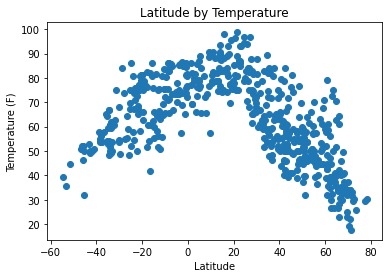

In [55]:
#set the axis
xaxis = df["Latitude"]
yaxis = df["Temperature"]

fig, ax = plt.subplots()
ax.scatter(xaxis, yaxis);
ax.set(title="Latitude by Temperature",
       xlabel="Latitude",
       ylabel="Temperature (F)");
fig.savefig("../output_data/Fig1.png", dpi=100, facecolor='w')


In [89]:
# This chart shows that the more extreme the latitudes are (either very low, or very high, the cooler the temperature is. It also proves that latitudes in between 0 and 20 are the warmest areas. 


## Latitude vs. Humidity Plot

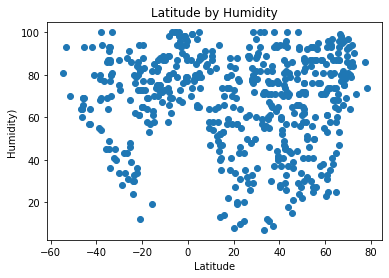

In [57]:
# Set the axis 
xaxis = df["Latitude"]
yaxis = df["Humidity"]

fig, ax = plt.subplots()
ax.scatter(xaxis, yaxis);
ax.set(title="Latitude by Humidity",
       xlabel="Latitude",
       ylabel="Humidity)");
fig.savefig("../output_data/Fig2.png", dpi=100, facecolor = 'w')

In [90]:
# This chart shows that humidity can be at any level regardless of latitude. It does look like it is both very humid at very low latitudes and very high latitudes

## Latitude vs. Cloudiness Plot

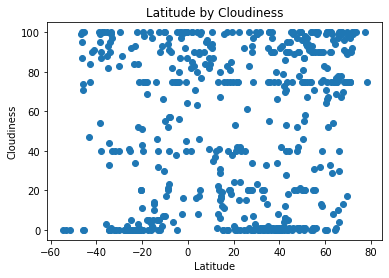

In [59]:
# Define axis
xaxis = df["Latitude"]
yaxis = df["Cloudiness"]

# Graph
fig, ax = plt.subplots()
ax.scatter(xaxis, yaxis);
ax.set(title="Latitude by Cloudiness",
       xlabel="Latitude",
       ylabel="Cloudiness");
fig.savefig("../output_data/Fig3.png", dpi=100, facecolor='w')

In [91]:
# this shows that regardless of areas it can be very cloudy or not cloudy. IT does however show that the lowest latitudes have the least amount of clouds.

## Latitude vs. Wind Speed Plot

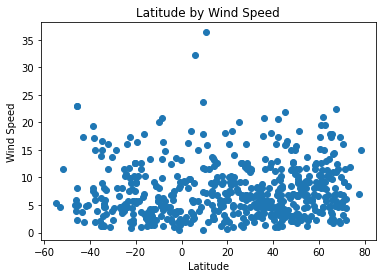

In [92]:

xaxis = df["Latitude"]
yaxis = df["Windspeed"]

# Graph
fig, ax = plt.subplots()
ax.scatter(xaxis, yaxis);
ax.set(title="Latitude by Wind Speed",
       xlabel="Latitude",
       ylabel="Wind Speed");
fig.savefig("../output_data/Fig4.png", dpi=100, facecolor='w')

In [93]:
#This shows that wind speeds are seldomly above 20MPS regardless of latitude 

## Linear Regression

In [94]:
#latitude dataframes
df_northern = df.loc[df["Latitude"] >= 0, :]
df_southern = df.loc[df["Latitude"] < 0, :]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.8160229871816645


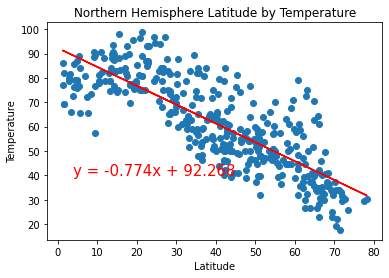

In [80]:

xaxis = df_northern["Latitude"]
yaxis = df_northern["Temperature"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(xaxis, yaxis)
regress_values = xaxis * slope + intercept
line_eq = "y = " + str(round(slope,3)) + "x + " + str(round(intercept,3))
fig, ax = plt.subplots()
ax.scatter(xaxis, yaxis);
ax.plot(xaxis, regress_values,"r-")
ax.annotate(line_eq, (4,40), color="red", fontsize="15")
ax.set(title="Northern Hemisphere Latitude by Temperature",
       xlabel="Latitude",
       ylabel="Temperature");
fig.savefig("../output_data/Fig5.png")
print(f"The r-value is: {rvalue}")

In [ ]:
#This shows that the temperature is hottest the closer it is towards 0 and coolest as the latitudes get higher .

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6939102773192805


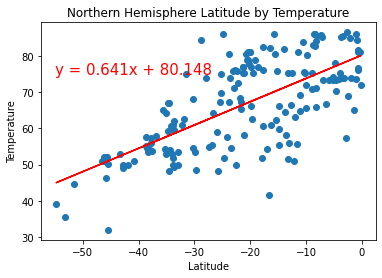

In [81]:
xaxis = df_southern["Latitude"]
yaxis = df_southern["Temperature"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(xaxis, yaxis)
regress_values = xaxis * slope + intercept
line_eq = "y = " + str(round(slope,3)) + "x + " + str(round(intercept,3))
fig, ax = plt.subplots()
ax.scatter(xaxis, yaxis);
ax.plot(xaxis, regress_values,"r-")
ax.annotate(line_eq, (-55,75), color="red", fontsize="15")
ax.set(title="Northern Hemisphere Latitude by Temperature",
       xlabel="Latitude",
       ylabel="Temperature");
fig.savefig("../output_data/Fig6.png")
print(f"The r-value is: {rvalue}")

In [95]:
# This chart clearly shows taht the closer we are to the equator, the warmer it is. This is clearly an understandable measure as the areas closest to the equator are considered tropical areas and have the warmest weather. It also shows that the further you are from the equator, the codler it is i.e(North Pole)

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.10768583675753739


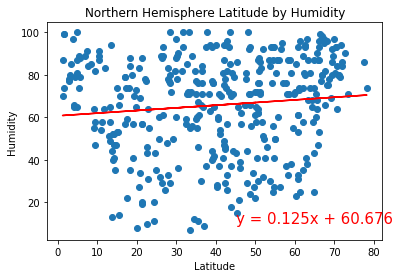

In [82]:
xaxis = df_northern["Latitude"]
yaxis = df_northern["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(xaxis, yaxis)
regress_values = xaxis * slope + intercept
line_eq = "y = " + str(round(slope,3)) + "x + " + str(round(intercept,3))
fig, ax = plt.subplots()
ax.scatter(xaxis, yaxis);
ax.plot(xaxis, regress_values,"r-")
ax.annotate(line_eq, (45,10), color="red", fontsize="15")
ax.set(title="Northern Hemisphere Latitude by Humidity",
       xlabel="Latitude",
       ylabel="Humidity");
fig.savefig("../output_data/Fig7.png")
print(f"The r-value is: {rvalue}")

In [96]:
# This shows that all places closest to the equator are humid, howevever from latitude 10-70 it may be humid it may also not be. 

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.27138642190280077


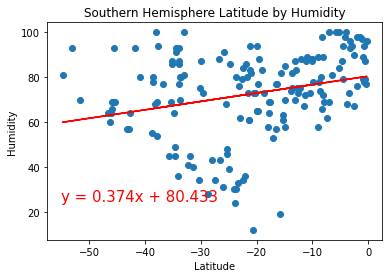

In [83]:
xaxis = df_southern["Latitude"]
yaxis = df_southern["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(xaxis, yaxis)
regress_values = xaxis * slope + intercept
line_eq = "y = " + str(round(slope,3)) + "x + " + str(round(intercept,3))
fig, ax = plt.subplots()
ax.scatter(xaxis, yaxis);
ax.plot(xaxis, regress_values,"r-")
ax.annotate(line_eq, (-55,25), color="red", fontsize="15")
ax.set(title="Southern Hemisphere Latitude by Humidity",
       xlabel="Latitude",
       ylabel="Humidity");
fig.savefig("../output_data/Fig8.png")
print(f"The r-value is: {rvalue}")

In [97]:
# This shows that humidity is most likeley not effected by the regional location 

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.19990493848496838


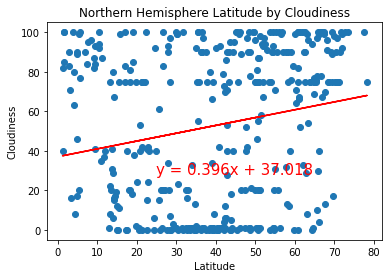

In [84]:
xaxis = df_northern["Latitude"]
yaxis = df_northern["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(xaxis, yaxis)
regress_values = xaxis * slope + intercept
line_eq = "y = " + str(round(slope,3)) + "x + " + str(round(intercept,3))
fig, ax = plt.subplots()
ax.scatter(xaxis, yaxis);
ax.plot(xaxis, regress_values,"r-")
ax.annotate(line_eq, (25,28), color="red", fontsize="15")
ax.set(title="Northern Hemisphere Latitude by Cloudiness",
       xlabel="Latitude",
       ylabel="Cloudiness");
fig.savefig("../output_data/Fig9.png")
print(f"The r-value is: {rvalue}")

In [99]:
# This shows that cloudiness may be irrelevant to geographical location. CLouds are controled by Thor 

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.06091946688822373


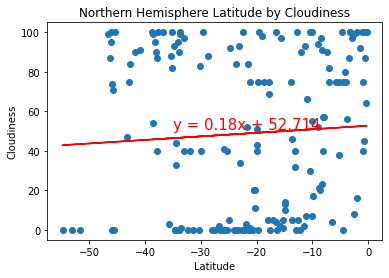

In [86]:
xaxis = df_southern["Latitude"]
yaxis = df_southern["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(xaxis, yaxis)
regress_values = xaxis * slope + intercept
line_eq = "y = " + str(round(slope,3)) + "x + " + str(round(intercept,3))
fig, ax = plt.subplots()
ax.scatter(xaxis, yaxis);
ax.plot(xaxis, regress_values,"r-")
ax.annotate(line_eq, (-35,51), color="red", fontsize="15")
ax.set(title="Northern Hemisphere Latitude by Cloudiness",
       xlabel="Latitude",
       ylabel="Cloudiness");
fig.savefig("../output_data/Fig10.png")
print(f"The r-value is: {rvalue}")

In [100]:
# This shows that clouds are highly volatile. It is either no clouds or very cloudy. 

In [101]:
####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.017695835746029526


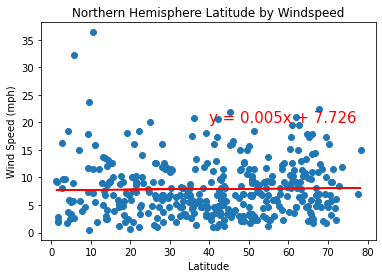

In [87]:
xaxis = df_northern["Latitude"]
yaxis = df_northern["Windspeed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(xaxis, yaxis)
regress_values = xaxis * slope + intercept
line_eq = "y = " + str(round(slope,3)) + "x + " + str(round(intercept,3))
fig, ax = plt.subplots()
ax.scatter(xaxis, yaxis);
ax.plot(xaxis, regress_values,"r-")
ax.annotate(line_eq, (40,20), color="red", fontsize="15")
ax.set(title="Northern Hemisphere Latitude by Windspeed",
       xlabel="Latitude",
       ylabel="Wind Speed (mph)");
fig.savefig("../output_data/Fig11.png")
print(f"The r-value is: {rvalue}")

In [102]:
# There is a very low correlation between the latitude and windspeed. It is either windy or not. 

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.1316942601813254


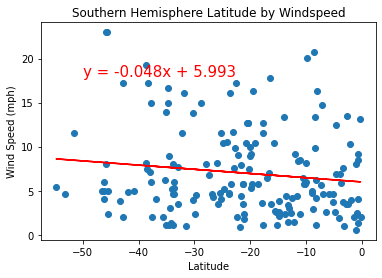

In [88]:
xaxis = df_southern["Latitude"]
yaxis = df_southern["Windspeed"]

# Plot out the graph with the regression line
(slope, intercept, rvalue, pvalue, stderr) = linregress(xaxis, yaxis)
regress_values = xaxis * slope + intercept
line_eq = "y = " + str(round(slope,3)) + "x + " + str(round(intercept,3))
fig, ax = plt.subplots()
ax.scatter(xaxis, yaxis);
ax.plot(xaxis, regress_values,"r-")
ax.annotate(line_eq, (-50,18), color="red", fontsize="15")
ax.set(title="Southern Hemisphere Latitude by Windspeed",
       xlabel="Latitude",
       ylabel="Wind Speed (mph)");
fig.savefig("../output_data/Fig12.png")
print(f"The r-value is: {rvalue}")

In [103]:
# This show that there is not much of an effect for windspeed and latitude. 